About Dataset

URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/data

Context

IMDB Dataset of top 1000 movies and tv shows.

You can find the EDA Process on - https://www.kaggle.com/harshitshankhdhar/eda-on-imdb-movies-dataset

Please consider UPVOTE if you found it useful.

Content

Data:-

Poster_Link - Link of the poster that imdb using

Series_Title = Name of the movie

Released_Year - Year at which that movie released

Certificate - Certificate earned by that movie

Runtime - Total runtime of the movie

Genre - Genre of the movie

IMDB_Rating - Rating of the movie at IMDB site

Overview - mini story/ summary

Meta_score - Score earned by the movie

Director - Name of the Director

Star1,Star2,Star3,Star4 - Name of the Stars

No_of_votes - Total number of votes

Gross - Money earned by that movie

Inspiration

Analysis of the gross of a movie vs directors.

Analysis of the gross of a movie vs different - different stars.

Analysis of the No_of_votes of a movie vs directors.

Analysis of the No_of_votes of a movie vs different - different stars.

Which actor prefer which Genre more?

Which combination of actors are getting good IMDB_Rating maximum time?

Which combination of actors are getting good gross?

In [2]:
# Set working directory to project root
import os

# Navigate to the root folder (adjust only if needed)
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Confirm you're in the root folder
print("✅ Current working directory:", os.getcwd())


✅ Current working directory: f:\JCMDataCenter\Kaggle\JCMDataMovies


In [3]:
# Librerías esenciales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Configuración de estilos
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("Data/raw/imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [5]:
df.shape  # filas y columnas

(1000, 16)

In [6]:
df.head()  # primeras filas

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
# Check initial data types and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [8]:
df.describe(include='all')  # resumen estadístico completo

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,1000,899,1000,1000,1000.000000,1000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,831
unique,1000,999,100,16,140,202,NaN,1000,NaN,548,660,841,891,939,NaN,823
top,https://m.media-amazon.com/images/M/MV5BMTY5OD...,Drishyam,2014,U,100 min,Drama,NaN,A man in London tries to help a counter-espion...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,1,2,32,234,23,85,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.949300,NaN,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.275491,NaN,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,NaN


In [9]:
# Convert 'Released_Year' to numeric again to be safe
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Clean 'Runtime': remove 'min' and convert to numeric
df['Runtime'] = df['Runtime'].str.replace(" min", "", regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Clean 'Gross': remove commas and convert to float
df['Gross'] = df['Gross'].str.replace(",", "", regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Convert 'Meta_score' to float (some values may be NaN or strings)
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')

# Convert 'IMDB_Rating' to float (should already be correct)
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')

# Convert 'No_of_Votes' to integer
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

# Remove extra whitespaces in 'Genre' and 'Director' columns
df['Genre'] = df['Genre'].str.strip()
df['Director'] = df['Director'].str.strip()

# Strip whitespace from actor names
for col in ['Star1', 'Star2', 'Star3', 'Star4']:
    df[col] = df[col].astype(str).str.strip()



In [10]:
# Rename 'No_of_Votes' to 'Votes'
df.rename(columns={'No_of_Votes': 'Votes', 'Series_Title': 'Title', 'Released_Year': 'Year', 'Gross': 'Revenue'}, inplace=True)


In [11]:
# Drop the poster link column
df.drop(columns=['Poster_Link', 'Meta_score'], inplace=True)


In [12]:
# Show updated data types
df.dtypes

# Show number of nulls after conversions
df.isnull().sum()


Title            0
Year             1
Certificate    101
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Votes            0
Revenue        169
dtype: int64

In [13]:
# Convert Year to nullable integer (Int64 supports NaN)
df['Year'] = df['Year'].astype('Int64')

# Convert categorical variables to 'category' type
categorical_columns = ['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [14]:
# Display basic structure of the dataset after cleaning
print(f"Dataset shape: {df.shape}")  # Number of rows and columns
df.head(3)  # Preview the first few rows


Dataset shape: (1000, 14)


,Title,Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Votes,Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [15]:
# Get unique non-null certificate values, sorted alphabetically
unique_certificates = df['Certificate'].dropna().unique()
unique_certificates = sorted(unique_certificates)

# Display them one by one
print("Unique certificate values:")
for cert in unique_certificates:
    print(f"- {cert}")


Unique certificate values:
- 16
- A
- Approved
- G
- GP
- PG
- PG-13
- Passed
- R
- TV-14
- TV-MA
- TV-PG
- U
- U/A
- UA
- Unrated


### 🎟️ Certificate Ratings – Meaning of Each Value

Below is an explanation of the unique values found in the `Certificate` column:

- **G**: General audience – suitable for all ages.
- **PG**: Parental guidance suggested – some content may not be suitable for children.
- **PG-13**: Parents strongly cautioned – not suitable for children under 13.
- **R**: Restricted – under 17 requires accompanying adult or guardian.
- **Approved / Passed**: Old U.S. ratings used before the MPAA system (pre-1968).
- **A**: Adult – restricted to adult audiences (used in India).
- **U**: Universal – suitable for all ages (used in UK and India).
- **UA / U/A**: Parental guidance required for minors (India).
- **GP**: Former MPAA rating, replaced by PG in 1972.
- **16**: Not suitable for audiences under 16 (European system).
- **TV-PG**: Parental guidance suggested – for television content.
- **TV-14**: Not suitable for children under 14 – for television.
- **TV-MA**: Mature audience only – may contain strong language or adult themes.
- **Unrated**: Not officially rated – often applies to independent or international films.


In [16]:
# Get summary statistics for numerical columns
df.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
Year,999.0,1991.217217,23.297025,1920.0,1976.0,1999.0,2009.0,2020.0
Runtime,1000.0,122.891,28.093671,45.0,103.0,119.0,137.0,321.0
IMDB_Rating,1000.0,7.9493,0.275491,7.6,7.7,7.9,8.1,9.3
Votes,1000.0,273692.911,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0
Revenue,831.0,68034750.873646,109750043.192185,1305.0,3253559.0,23530892.0,80750893.5,936662225.0


In [17]:
# Get summary statistics for categorical columns
df.describe(include=[object]).T

,count,unique,top,freq
Title,1000,999,Drishyam,2
Genre,1000,202,Drama,85
Overview,1000,1000,A man in London tries to help a counter-espion...,1


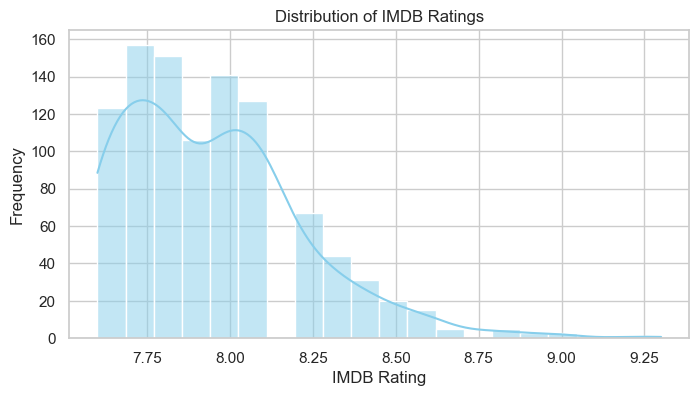

In [18]:
# Distribution of IMDB ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of IMDB Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("Frequency")
plt.show()

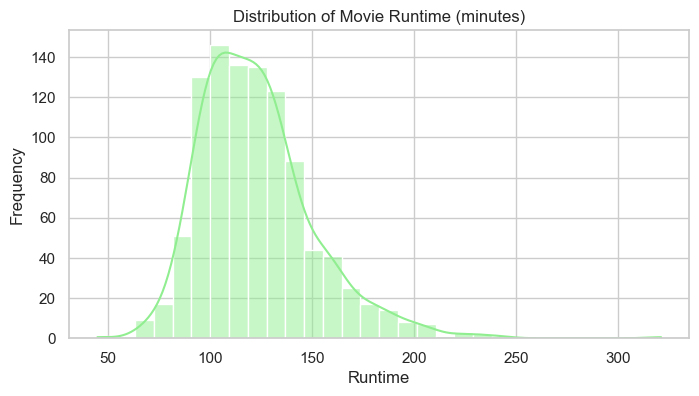

In [19]:
# Distribution of movie runtimes
plt.figure(figsize=(8, 4))
sns.histplot(df['Runtime'], bins=30, kde=True, color='lightgreen')
plt.title("Distribution of Movie Runtime (minutes)")
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.show()

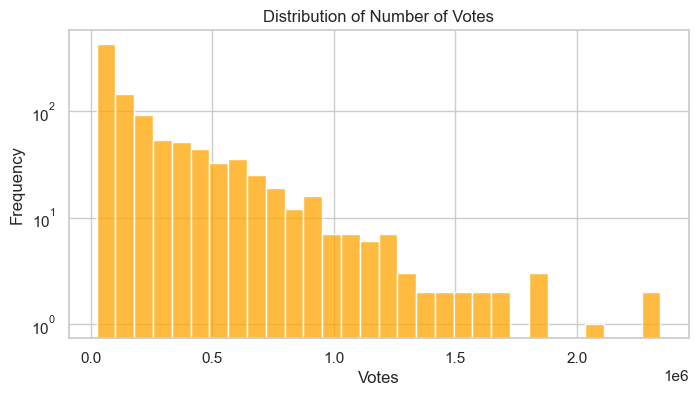

In [20]:
# Distribution of number of votes
plt.figure(figsize=(8, 4))
sns.histplot(df['Votes'], bins=30, kde=False, color='orange')
plt.title("Distribution of Number of Votes")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.yscale("log")  # Optional: log scale for better visibility of skewed data
plt.show()

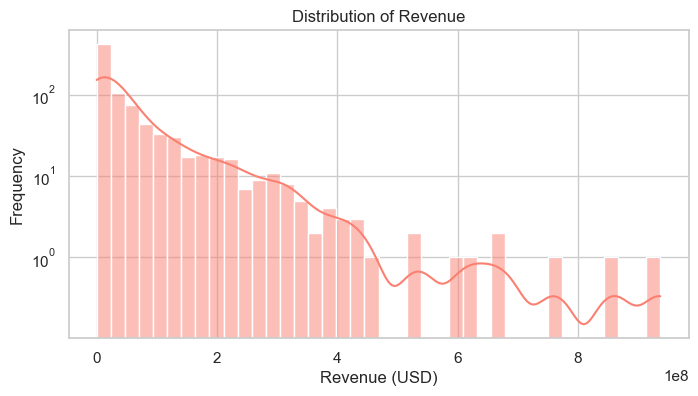

In [21]:
# Distribution of Gross Revenue (in USD)
plt.figure(figsize=(8, 4))
sns.histplot(df['Revenue'].dropna(), bins=40, kde=True, color='salmon')
plt.title("Distribution of Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.yscale("log")  # Revenue is usually very skewed
plt.show()

In [22]:
# Most common certificates (e.g., PG-13, R, etc.)
df['Certificate'].value_counts(dropna=False).head(10)


Certificate
U           234
A           197
UA          175
R           146
NaN         101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
Name: count, dtype: int64

In [23]:
# Most common genres (note: Genre contains multiple values)
top_genres = df['Genre'].str.split(', ').explode().value_counts().head(10)
print("Top 10 most common genres:")
print(top_genres)

Top 10 most common genres:
Genre
Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64


In [24]:
# Most frequent directors
df['Director'].value_counts().head(10)

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
Stanley Kubrick      9
Woody Allen          9
Billy Wilder         9
David Fincher        8
Clint Eastwood       8
Name: count, dtype: int64

In [25]:
# Most frequent protagonist
df['Star1'].value_counts().head(10)

Star1
Tom Hanks            12
Robert De Niro       11
Clint Eastwood       10
Al Pacino            10
Humphrey Bogart       9
Leonardo DiCaprio     9
James Stewart         8
Johnny Depp           8
Christian Bale        8
Aamir Khan            7
Name: count, dtype: int64

<Figure size 1000x500 with 0 Axes>

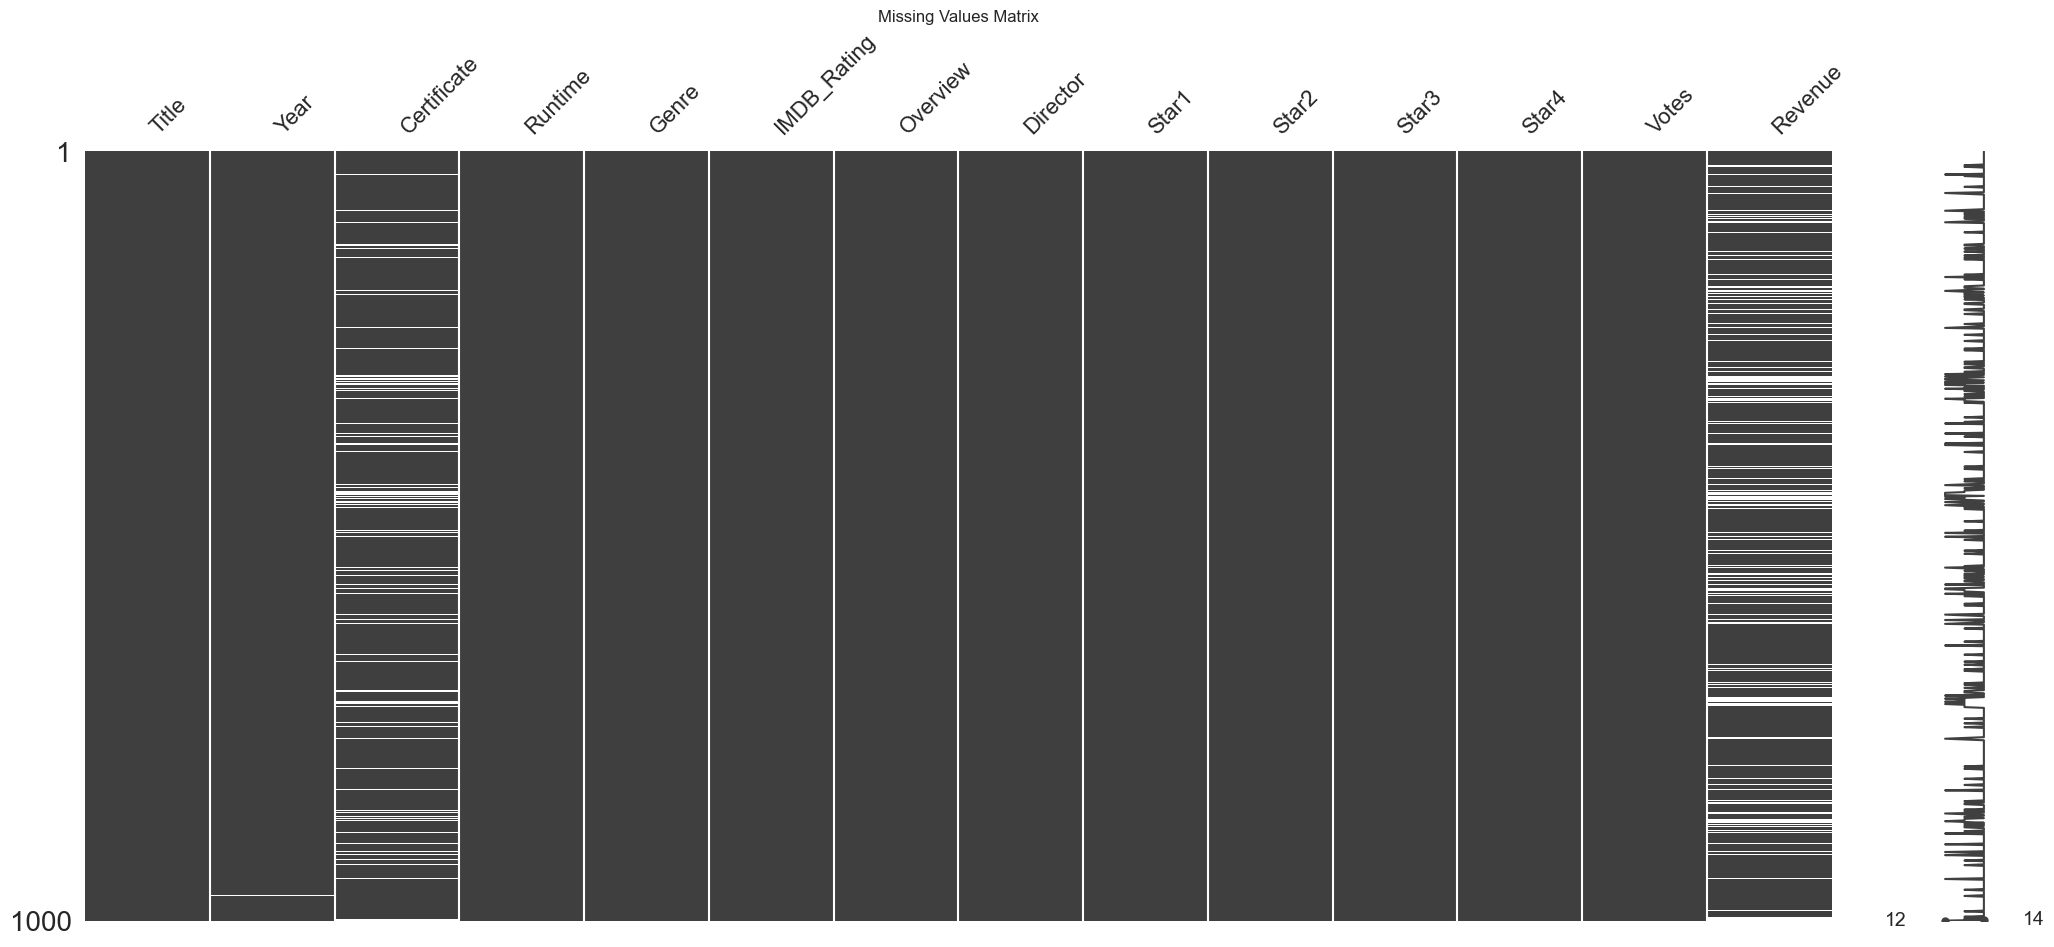

In [26]:
# Visual overview of missing values across the dataset
plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

<Figure size 1000x600 with 0 Axes>

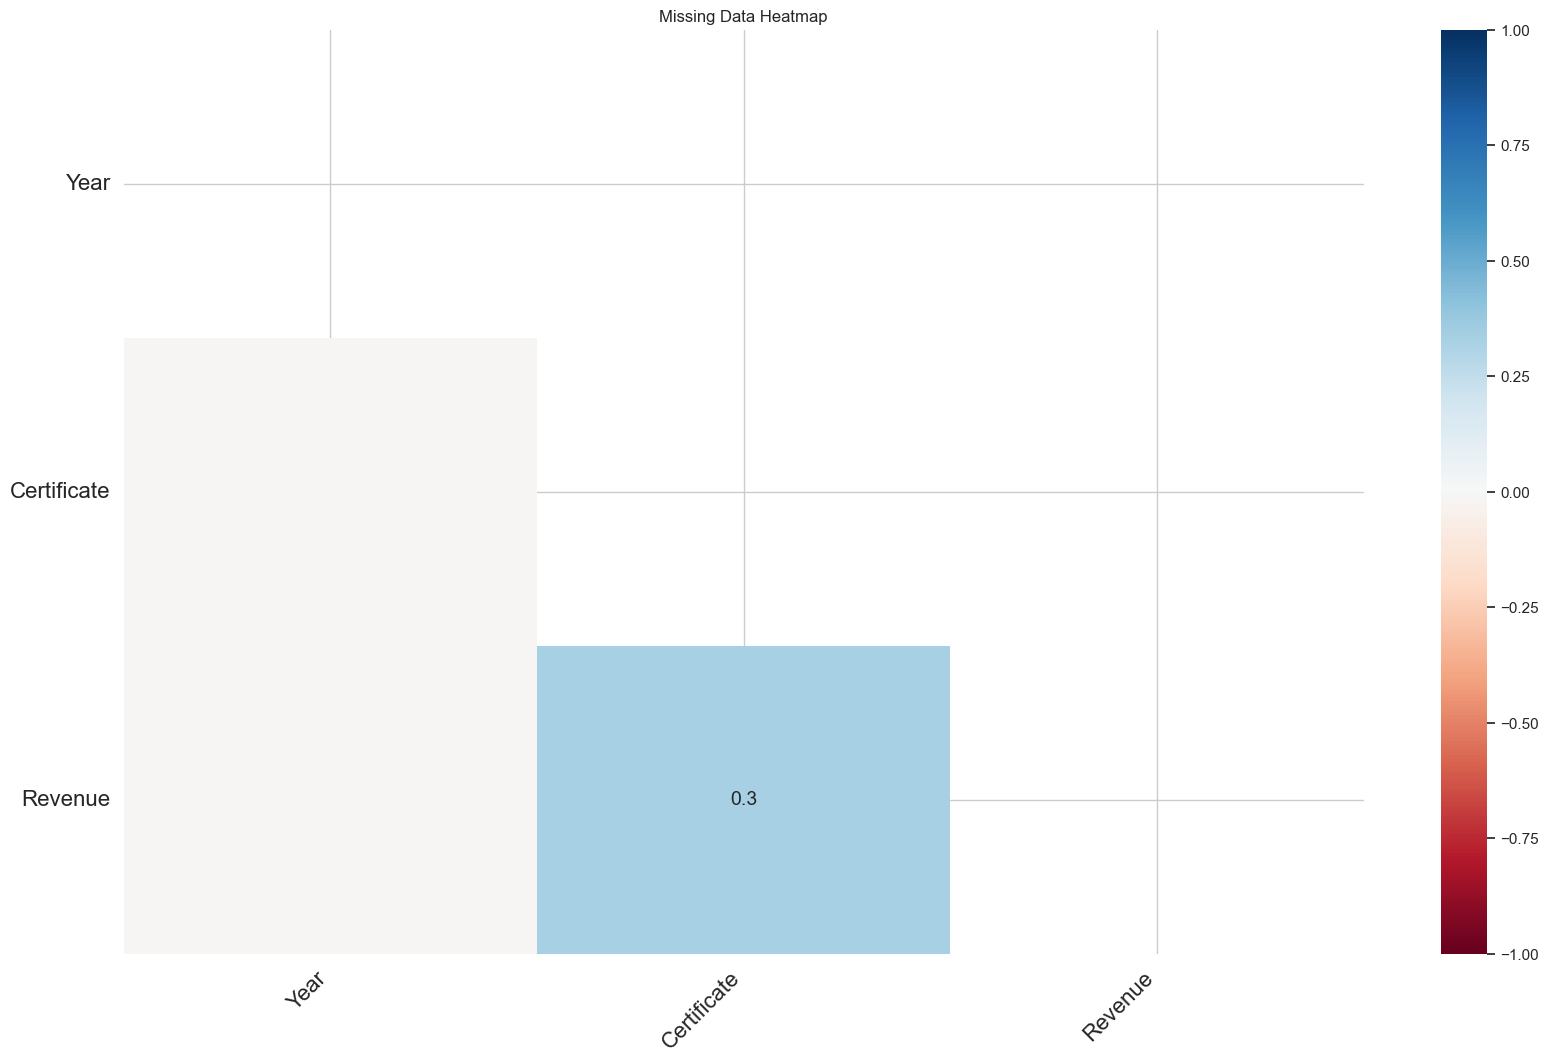

In [27]:
# Heatmap of missing data correlations (useful for identifying patterns)
plt.figure(figsize=(10, 6))
msno.heatmap(df)
plt.title("Missing Data Heatmap")
plt.show()

In [28]:
df.nunique().sort_values()
df.isnull().mean().sort_values(ascending=False)


Revenue        0.169
Certificate    0.101
Year           0.001
Title          0.000
Genre          0.000
Runtime        0.000
IMDB_Rating    0.000
Overview       0.000
Star1          0.000
Director       0.000
Star2          0.000
Star3          0.000
Star4          0.000
Votes          0.000
dtype: float64

In [29]:
df.head()

,Title,Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Votes,Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [30]:
# Now safely drop NaN values and get the year range
year_range = df['Year'].dropna()

# Display the minimum and maximum year as integers
print(f"Movies range from {int(year_range.min())} to {int(year_range.max())}")


Movies range from 1920 to 2020


In [31]:
# Combine all star columns into a single Series
# This creates a long list with every actor/actress in every role
all_stars = pd.concat([
    df['Star1'], 
    df['Star2'], 
    df['Star3'], 
    df['Star4']
], axis=0)

# Drop missing values and strip whitespace
all_stars = all_stars.dropna().str.strip()

# Count frequency of each actor/actress
star_counts = all_stars.value_counts()

# Display the top 5 most frequent actors/actresses
print("Top 5 most frequent actors/actresses:")
print(star_counts.head(5))


Top 5 most frequent actors/actresses:
Robert De Niro    17
Tom Hanks         14
Al Pacino         13
Clint Eastwood    12
Brad Pitt         12
Name: count, dtype: int64


In [32]:
# Sort by IMDB rating (descending) and then by number of votes (descending)
top_5_best = df.sort_values(by=['IMDB_Rating', 'Votes'], ascending=[False, False]).head(5)

# Sort by IMDB rating (ascending) and then by number of votes (ascending)
top_5_worst = df.sort_values(by=['IMDB_Rating', 'Votes'], ascending=[True, True]).head(5)

# Display top 5 best rated movies
print("🎖️ Top 5 Best Rated Movies (with most votes to break ties):")
print(top_5_best[['Title', 'IMDB_Rating', 'Votes', 'Year']])

# Display top 5 worst rated movies
print("\n💀 Top 5 Worst Rated Movies (with fewest votes to break ties):")
print(top_5_worst[['Title', 'IMDB_Rating', 'Votes', 'Year']])


🎖️ Top 5 Best Rated Movies (with most votes to break ties):
                      Title  IMDB_Rating    Votes  Year
0  The Shawshank Redemption          9.3  2343110  1994
1             The Godfather          9.2  1620367  1972
2           The Dark Knight          9.0  2303232  2008
3    The Godfather: Part II          9.0  1129952  1974
4              12 Angry Men          9.0   689845  1957

💀 Top 5 Worst Rated Movies (with fewest votes to break ties):
                 Title  IMDB_Rating  Votes  Year
989   The Long Goodbye          7.6  26337  1973
998           Lifeboat          7.6  26471  1944
971  Omohide poro poro          7.6  27071  1991
981     On Golden Pond          7.6  27650  1981
880           Nelyubov          7.6  29765  2017


In [33]:
# Filter movies with certificate 'R'
r_movies = df[df['Certificate'] == 'R']

# Filter movies with certificate 'G'
g_movies = df[df['Certificate'] == 'G']

# Print counts
print(f"Number of R-rated movies: {r_movies.shape[0]}")
print(f"Number of G-rated movies: {g_movies.shape[0]}")

# Display titles of R-rated movies
print("\n🎬 R-rated movies:")
print(r_movies['Title'].tolist())

# Display titles of G-rated movies
print("\n🎬 G-rated movies:")
print(g_movies['Title'].tolist())


Number of R-rated movies: 146
Number of G-rated movies: 12

🎬 R-rated movies:
['Saving Private Ryan', 'The Pianist', 'American History X', 'Apocalypse Now', 'Alien', '1917', 'Jagten', 'Incendies', 'Reservoir Dogs', 'Amadeus', 'Das Boot', 'El secreto de sus ojos', 'Der Untergang', 'Dom za vesanje', 'Portrait de la jeune fille en feu', 'Mommy', 'Room', 'Relatos salvajes', 'Gran Torino', 'Into the Wild', 'No Country for Old Men', 'Taegukgi hwinalrimyeo', 'Before Sunset', 'Kill Bill: Vol. 1', 'Crna macka, beli macor', 'The Big Lebowski', 'Before Sunrise', 'Ba wang bie ji', 'Fitzcarraldo', 'Life of Brian', 'Andrei Rublev', 'Short Term 12', 'Deadpool', 'Yip Man', 'Tropa de Elite', 'Dallas Buyers Club', 'Bom Yeoareum Gaeul Gyeoul Geurigo Bom', 'Dogville', 'Donnie Darko', 'Magnolia', 'Festen', 'Central do Brasil', 'Sling Blade', 'Bound by Honor', 'Do the Right Thing', 'Papillon', 'The Last Picture Show', 'Captain Fantastic', 'Before Midnight', 'The Irishman', 'Moon', 'Låt den rätte komma in', 

In [34]:
# Filter movies with certificate 'R'
r_movies = df[df['Certificate'] == 'R']

# Top 5 by IMDB rating (with votes as tiebreaker)
top_5_r_by_rating = r_movies.sort_values(
    by=['IMDB_Rating', 'Votes'], 
    ascending=[False, False]
).head(5)

# Top 5 by revenue (with rating as tiebreaker)
top_5_r_by_revenue = r_movies.sort_values(
    by=['Revenue', 'IMDB_Rating'], 
    ascending=[False, False]
).head(5)

# Display results
print("🎖️ Top 5 R-rated movies by IMDB rating:")
print(top_5_r_by_rating[['Title', 'IMDB_Rating', 'Votes', 'Revenue']])

print("\n💰 Top 5 R-rated movies by revenue:")
print(top_5_r_by_revenue[['Title', 'Revenue', 'IMDB_Rating', 'Votes']])


🎖️ Top 5 R-rated movies by IMDB rating:
                  Title  IMDB_Rating    Votes      Revenue
24  Saving Private Ryan          8.6  1235804  216540909.0
40   American History X          8.5  1034705    6719864.0
38          The Pianist          8.5   729603   32572577.0
75                Alien          8.4   787806   78900000.0
74       Apocalypse Now          8.4   606398   83471511.0

💰 Top 5 R-rated movies by revenue:
                      Title      Revenue  IMDB_Rating    Votes
348                Deadpool  363070709.0          8.0   902669
722              Deadpool 2  324591735.0          7.7   478586
24      Saving Private Ryan  216540909.0          8.6  1235804
724                 Get Out  176040665.0          7.7   492851
606  Straight Outta Compton  161197785.0          7.8   179264


In [35]:
# Show the row for a specific movie title (case-sensitive)
df[df['Title'] == 'Joker']


,Title,Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Votes,Revenue
33,Joker,2019,A,122,"Crime, Drama, Thriller",8.5,"In Gotham City, mentally troubled comedian Art...",Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,335451311.0


In [36]:
# Create a new DataFrame showing each column and its data type
column_types = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values
})

# Display the result
column_types


,Column,Data_Type
0,Title,object
1,Year,Int64
2,Certificate,category
3,Runtime,int64
4,Genre,object
5,IMDB_Rating,float64
6,Overview,object
7,Director,category
8,Star1,category
9,Star2,category


In [37]:
df.head()

,Title,Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,Votes,Revenue
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [38]:
# Create 'processed' directory if it doesn't exist
import os

os.makedirs("data/processed", exist_ok=True)


In [39]:
# Save the cleaned dataset to a new CSV file
df.to_csv("Data/processed/cleaned_imdb_top_1000.csv", index=False)

print("✅ Cleaned dataset saved successfully at: data/processed/cleaned_imdb_top_1000.csv")


✅ Cleaned dataset saved successfully at: data/processed/cleaned_imdb_top_1000.csv


In [40]:
# Search for movies that contain specific words in the title (case-insensitive)
saga_movies = df[df['Title'].str.contains("The Lord of the Rings", case=False, na=False)]

# Display matching movies
saga_movies[['Title', 'Year', 'IMDB_Rating', 'Revenue', 'Certificate']]


,Title,Year,IMDB_Rating,Revenue,Certificate
5,The Lord of the Rings: The Return of the King,2003,8.9,377845905.0,U
10,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,315544750.0,U
13,The Lord of the Rings: The Two Towers,2002,8.7,342551365.0,UA


In [41]:
# Filter movies released on or before 2020
df_pre_2020 = df[df['Year'] <= 2020]

# Sort by revenue and select top 5
top_5_all_time = df_pre_2020.sort_values(by='Revenue', ascending=False).head(5)

print("🎬 Top 5 highest grossing movies (all-time up to 2020):")
print(top_5_all_time[['Title', 'Year', 'Revenue', 'IMDB_Rating']])


🎬 Top 5 highest grossing movies (all-time up to 2020):
                                          Title  Year      Revenue  \
477  Star Wars: Episode VII - The Force Awakens  2015  936662225.0   
59                            Avengers: Endgame  2019  858373000.0   
623                                      Avatar  2009  760507625.0   
60                       Avengers: Infinity War  2018  678815482.0   
652                                     Titanic  1997  659325379.0   

     IMDB_Rating  
477          7.9  
59           8.4  
623          7.8  
60           8.4  
652          7.8  


In [42]:
# Filter movies from 2000 to 2020
df_21st_century = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Sort by revenue and select top 5
top_5_21st_century = df_21st_century.sort_values(by='Revenue', ascending=False).head(5)

print("\n🎬 Top 5 highest grossing movies (21st century up to 2020):")
print(top_5_21st_century[['Title', 'Year', 'Revenue', 'IMDB_Rating']])



🎬 Top 5 highest grossing movies (21st century up to 2020):
                                          Title  Year      Revenue  \
477  Star Wars: Episode VII - The Force Awakens  2015  936662225.0   
59                            Avengers: Endgame  2019  858373000.0   
623                                      Avatar  2009  760507625.0   
60                       Avengers: Infinity War  2018  678815482.0   
357                                The Avengers  2012  623279547.0   

     IMDB_Rating  
477          7.9  
59           8.4  
623          7.8  
60           8.4  
357          8.0  


c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


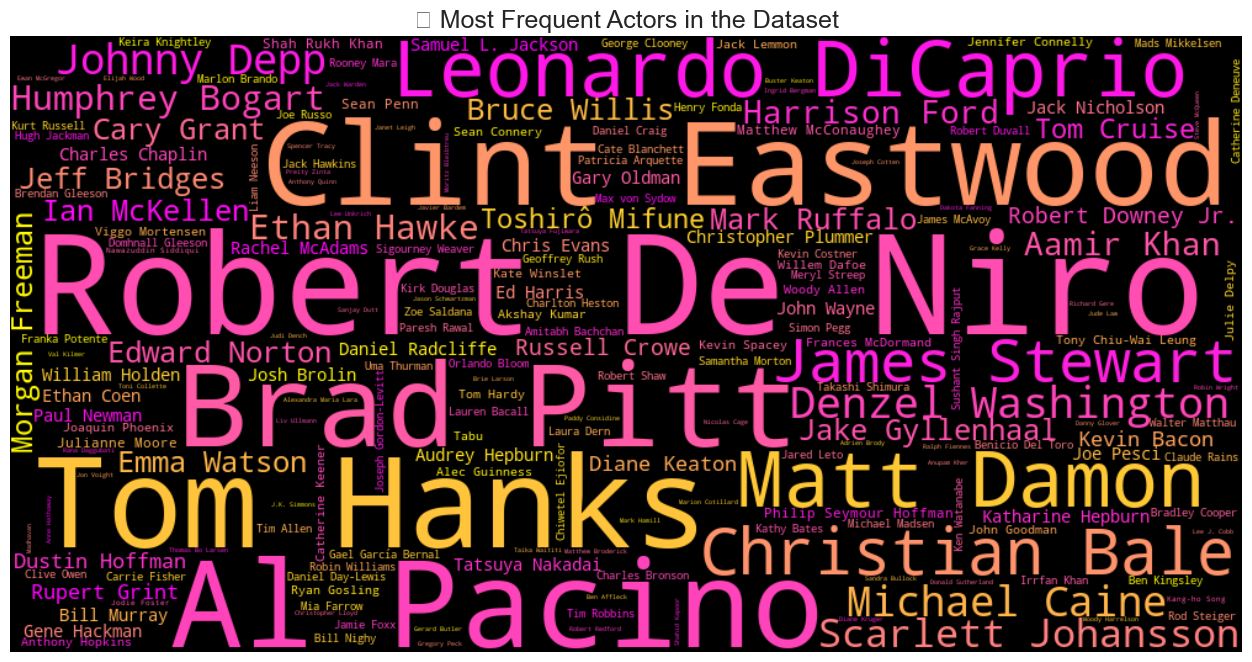

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all actor columns into a single Series
all_actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']], axis=0)

# Drop nulls and strip spaces
all_actors = all_actors.dropna().str.strip()

# Count frequency of each full actor name
actor_counts = all_actors.value_counts()

# Create the WordCloud from frequencies
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    colormap='spring'
).generate_from_frequencies(actor_counts)

# Plot the WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('🎭 Most Frequent Actors in the Dataset', fontsize=18)
plt.show()


c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


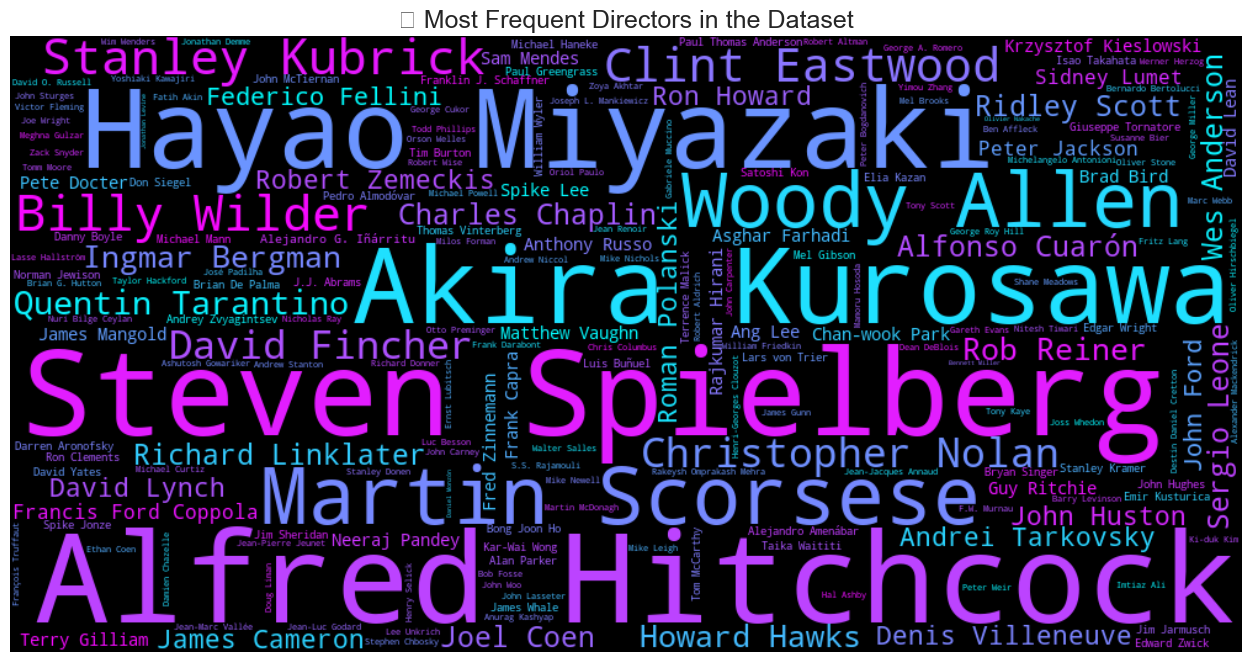

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Drop missing values and strip whitespace in 'Director' column
directors = df['Director'].dropna().str.strip()

# Count occurrences of each director
director_counts = directors.value_counts()

# Create the WordCloud from frequencies
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    colormap='cool'
).generate_from_frequencies(director_counts)

# Plot the WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('🎬 Most Frequent Directors in the Dataset', fontsize=18)
plt.show()


In [45]:
# Explode genres into separate rows (e.g., "Drama, Crime" → two rows)
df_exploded = df.copy()
df_exploded['Genre'] = df_exploded['Genre'].str.split(', ')
df_exploded = df_exploded.explode('Genre')

# Drop missing or blank genres just in case
df_exploded = df_exploded[df_exploded['Genre'].notna()]


In [70]:
# Group by Genre and calculate average rating, revenue, votes, count
genre_stats = df_exploded.groupby('Genre').agg({
    'Title': 'count',
    'IMDB_Rating': 'mean',
    'Revenue': 'mean',
    'Votes': 'mean'
}).rename(columns={
    'Title': 'Movie_Count',
    'IMDB_Rating': 'Avg_Rating',
    'Revenue': 'Avg_Revenue',
    'Votes': 'Avg_Votes'
}).sort_values(by='Movie_Count', ascending=False)

# Round results for clarity
genre_stats = genre_stats.round(2)
genre_stats.head(10)


,Movie_Count,Avg_Rating,Avg_Revenue,Avg_Votes
Genre,,,,
Drama,724,7.96,4.605967e+07,240729.68
Comedy,233,7.90,6.412530e+07,225465.97
Crime,209,7.95,4.068014e+07,281322.12
Adventure,196,7.95,1.657313e+08,424952.95
Action,189,7.95,1.412393e+08,404172.41
Thriller,137,7.91,5.867663e+07,300050.74
Romance,125,7.93,4.035885e+07,200913.14
Biography,109,7.94,5.525602e+07,251898.55
Mystery,99,7.97,4.127438e+07,293463.36


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\4181415651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_stats.reset_index(), x='Movie_Count', y='Genre', palette='magma')
C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\4181415651.py:9: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


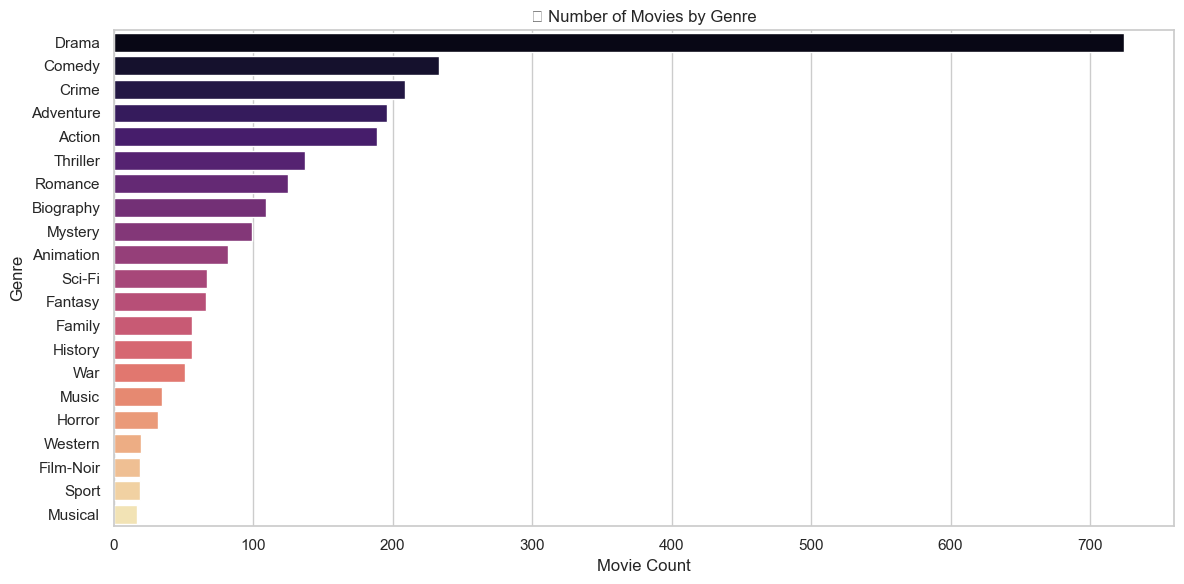

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats.reset_index(), x='Movie_Count', y='Genre', palette='magma')
plt.title("🎬 Number of Movies by Genre")
plt.xlabel("Movie Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\3572957336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_stats.reset_index().sort_values(by='Avg_Rating', ascending=False),
C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\3572957336.py:7: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


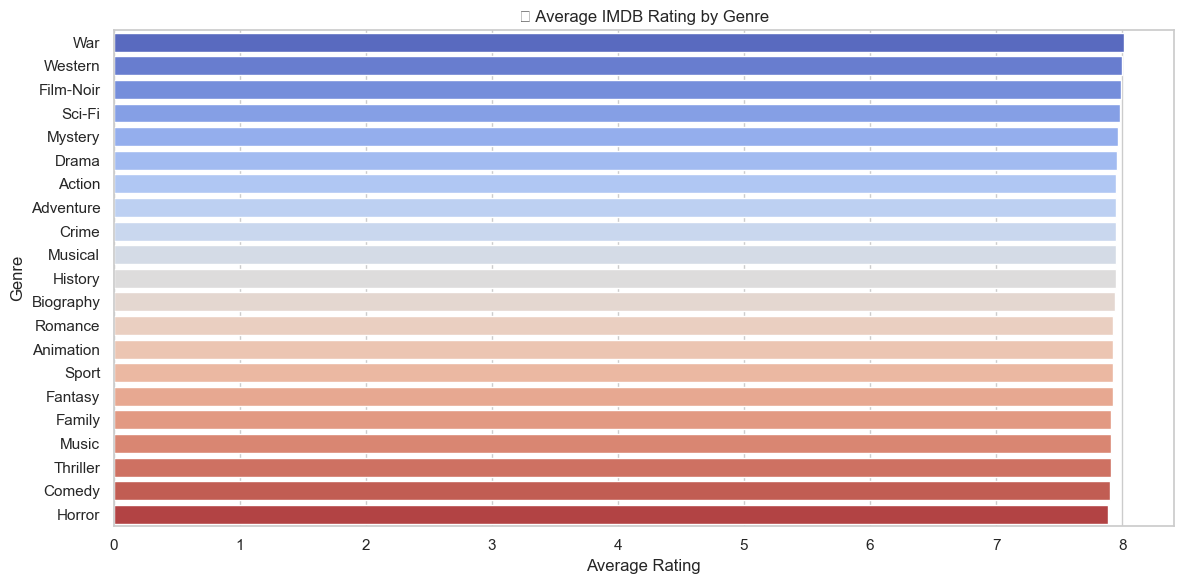

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats.reset_index().sort_values(by='Avg_Rating', ascending=False), 
            x='Avg_Rating', y='Genre', palette='coolwarm')
plt.title("⭐ Average IMDB Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


In [49]:
# Ensure Year is integer-compatible (nullable Int64 already set)
df['Decade'] = (df['Year'] // 10) * 10
df['Decade'] = df['Decade'].astype('Int64')


In [50]:
# Group by decade and compute aggregate metrics
decade_stats = df.groupby('Decade').agg({
    'Title': 'count',
    'IMDB_Rating': 'mean',
    'Revenue': 'mean',
    'Votes': 'mean'
}).rename(columns={
    'Title': 'Movie_Count',
    'IMDB_Rating': 'Avg_Rating',
    'Revenue': 'Avg_Revenue',
    'Votes': 'Avg_Votes'
}).sort_index()

# Round for clarity
decade_stats = decade_stats.round(2)
decade_stats


,Movie_Count,Avg_Rating,Avg_Revenue,Avg_Votes
Decade,,,,
1920,11,8.13,1.844978e+06,74683.82
1930,24,7.97,1.840348e+07,89729.71
1940,35,8.03,8.293462e+06,103858.40
1950,56,8.06,1.417469e+07,118287.55
1960,73,7.97,3.163478e+07,122554.27
1970,76,7.97,5.287953e+07,207811.17
1980,89,7.95,6.231487e+07,260641.13
1990,150,7.96,6.123000e+07,355100.29
2000,237,7.90,6.965808e+07,346421.69


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\1039311096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_stats.reset_index(), x='Decade', y='Movie_Count', palette='crest')
C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\1039311096.py:6: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


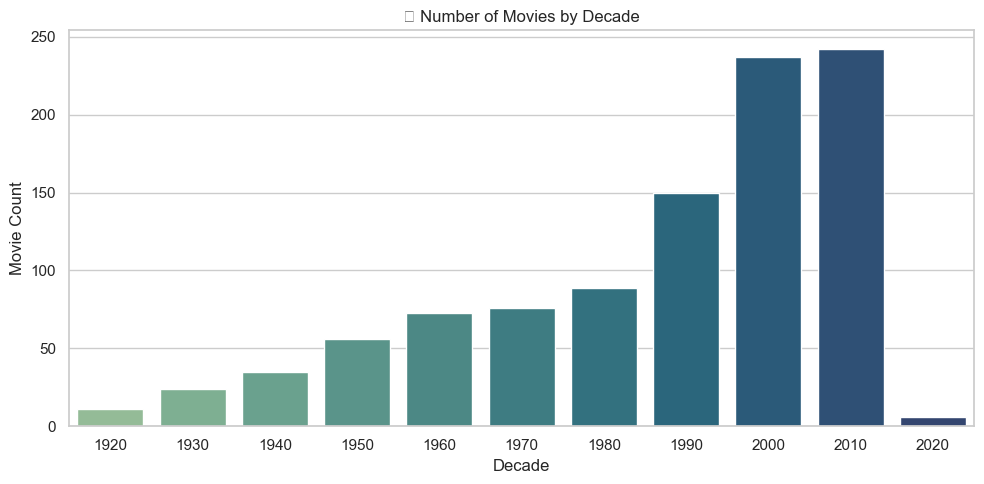

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(data=decade_stats.reset_index(), x='Decade', y='Movie_Count', palette='crest')
plt.title("🎥 Number of Movies by Decade")
plt.xlabel("Decade")
plt.ylabel("Movie Count")
plt.tight_layout()
plt.show()


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\2727915459.py:7: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


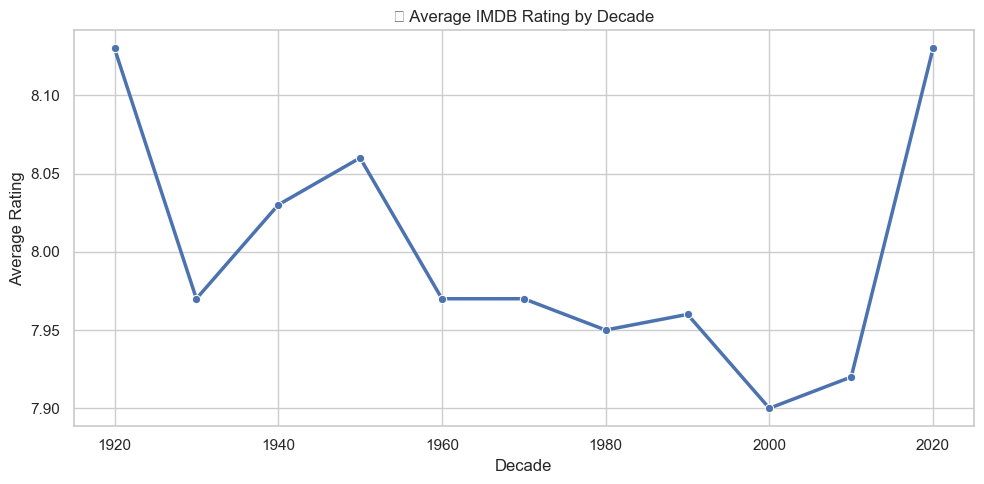

In [52]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=decade_stats.reset_index(), x='Decade', y='Avg_Rating', marker='o', linewidth=2.5)
plt.title("⭐ Average IMDB Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\2403275621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_stats.reset_index(), x='Decade', y='Avg_Revenue', palette='flare')
C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\2403275621.py:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


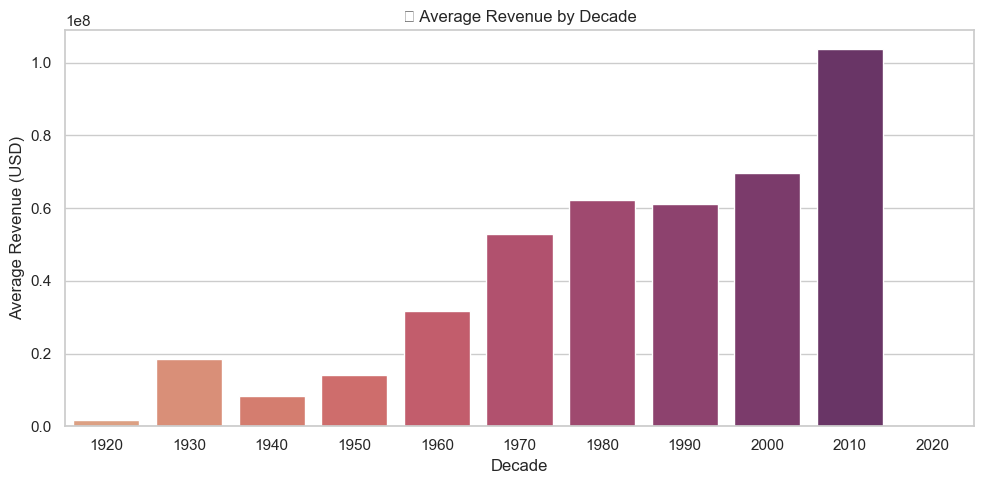

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(data=decade_stats.reset_index(), x='Decade', y='Avg_Revenue', palette='flare')
plt.title("💰 Average Revenue by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Revenue (USD)")
plt.tight_layout()
plt.show()


In [54]:
# Group by certificate and calculate aggregated metrics
certificate_stats = df.groupby('Certificate').agg({
    'Title': 'count',
    'IMDB_Rating': 'mean',
    'Revenue': 'mean',
    'Votes': 'mean',
    'Runtime': 'mean'
}).rename(columns={
    'Title': 'Movie_Count',
    'IMDB_Rating': 'Avg_Rating',
    'Revenue': 'Avg_Revenue',
    'Votes': 'Avg_Votes',
    'Runtime': 'Avg_Runtime'
}).sort_values(by='Movie_Count', ascending=False)

# Round for readability
certificate_stats = certificate_stats.round(2)
certificate_stats


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\1046199089.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  certificate_stats = df.groupby('Certificate').agg({


,Movie_Count,Avg_Rating,Avg_Revenue,Avg_Votes,Avg_Runtime
Certificate,,,,,
U,234,7.98,8.724658e+07,256106.36,124.16
A,197,8.00,6.388713e+07,428215.05,128.94
UA,175,7.96,1.311460e+08,439032.58,129.33
R,146,7.87,2.579360e+07,212991.87,122.37
PG-13,43,7.80,3.694786e+07,144101.98,116.95
PG,37,7.93,1.788827e+07,101580.57,114.27
Passed,34,8.02,5.435554e+06,73523.09,106.21
G,12,8.00,4.959633e+07,134312.50,119.67
Approved,11,7.95,6.949014e+06,71679.73,111.09


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\3196314603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=certificate_stats.reset_index(), x='Movie_Count', y='Certificate', palette='Set3')
C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\3196314603.py:6: UserWarning: Glyph 127903 (\N{ADMISSION TICKETS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\3196314603.py:6: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127903 (\N{ADMISSION TICKETS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 6503

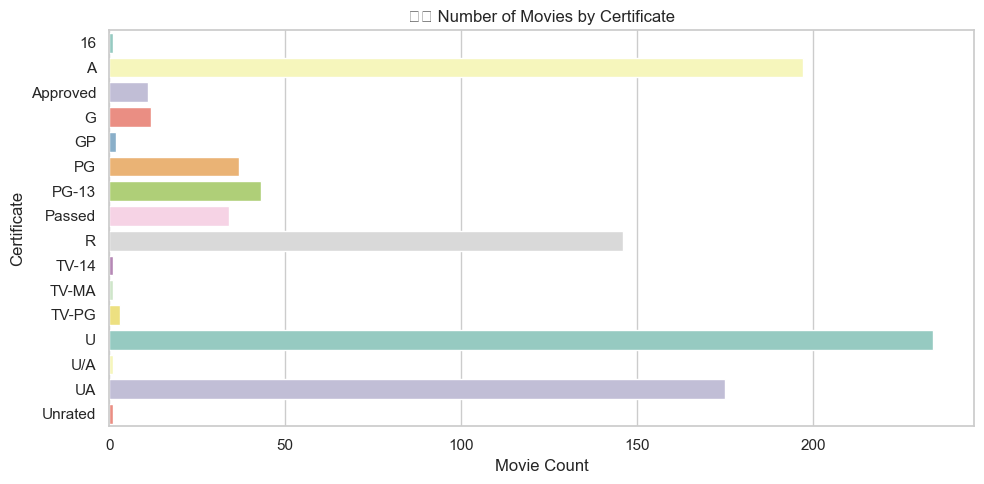

In [55]:
plt.figure(figsize=(10, 5))
sns.barplot(data=certificate_stats.reset_index(), x='Movie_Count', y='Certificate', palette='Set3')
plt.title("🎟️ Number of Movies by Certificate")
plt.xlabel("Movie Count")
plt.ylabel("Certificate")
plt.tight_layout()
plt.show()


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\3448499080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=certificate_stats.reset_index().sort_values(by='Avg_Rating', ascending=False),
C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\3448499080.py:7: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


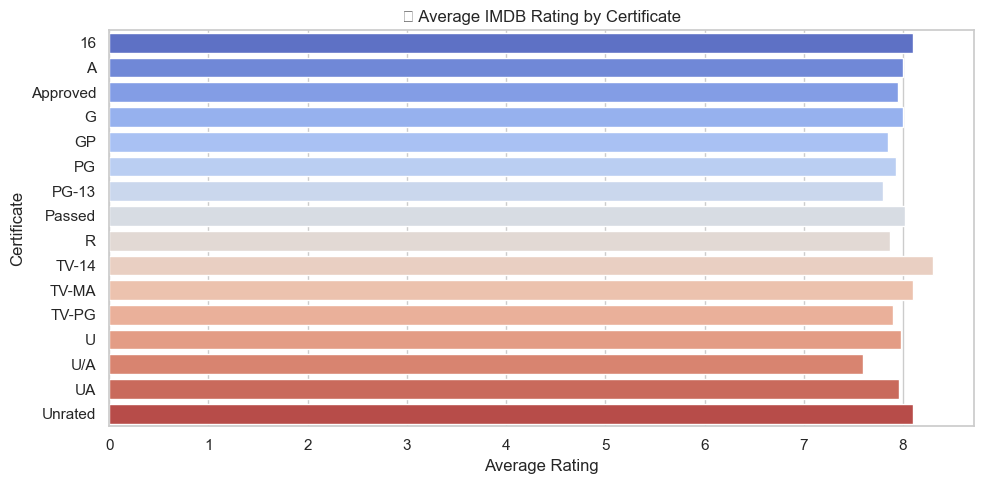

In [56]:
plt.figure(figsize=(10, 5))
sns.barplot(data=certificate_stats.reset_index().sort_values(by='Avg_Rating', ascending=False),
            x='Avg_Rating', y='Certificate', palette='coolwarm')
plt.title("⭐ Average IMDB Rating by Certificate")
plt.xlabel("Average Rating")
plt.ylabel("Certificate")
plt.tight_layout()
plt.show()


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\1686499442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=certificate_stats.reset_index().sort_values(by='Avg_Revenue', ascending=False),
C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\1686499442.py:7: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


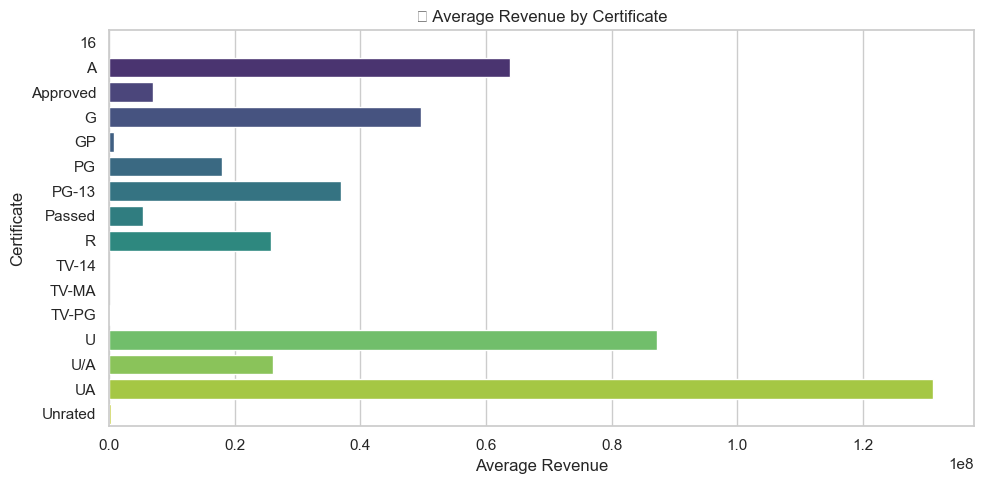

In [57]:
plt.figure(figsize=(10, 5))
sns.barplot(data=certificate_stats.reset_index().sort_values(by='Avg_Revenue', ascending=False),
            x='Avg_Revenue', y='Certificate', palette='viridis')
plt.title("💰 Average Revenue by Certificate")
plt.xlabel("Average Revenue")
plt.ylabel("Certificate")
plt.tight_layout()
plt.show()


In [58]:
# Group by Director and calculate metrics
director_stats = df.groupby('Director').agg({
    'Title': 'count',
    'IMDB_Rating': 'mean',
    'Revenue': 'mean',
    'Votes': 'mean'
}).rename(columns={
    'Title': 'Movie_Count',
    'IMDB_Rating': 'Avg_Rating',
    'Revenue': 'Avg_Revenue',
    'Votes': 'Avg_Votes'
})

# Filter to include only directors with at least 3 movies (optional)
director_stats = director_stats[director_stats['Movie_Count'] >= 3]

# Sort by number of movies
director_stats = director_stats.sort_values(by='Movie_Count', ascending=False).round(2)
director_stats.head(10)


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\968176147.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  director_stats = df.groupby('Director').agg({


,Movie_Count,Avg_Rating,Avg_Revenue,Avg_Votes
Director,,,,
Alfred Hitchcock,14,8.01,1.323438e+07,192612.64
Steven Spielberg,13,8.03,1.906256e+08,601320.46
Hayao Miyazaki,11,8.02,5.577654e+06,213519.82
Akira Kurosawa,10,8.22,1.139155e+06,94159.90
Martin Scorsese,10,8.17,5.383192e+07,651353.00
Stanley Kubrick,9,8.23,3.063561e+07,435472.67
Billy Wilder,9,8.14,1.182082e+07,115322.56
Woody Allen,9,7.79,3.069691e+07,135834.22
Clint Eastwood,8,7.91,7.408658e+07,335478.12


C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\2293982292.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


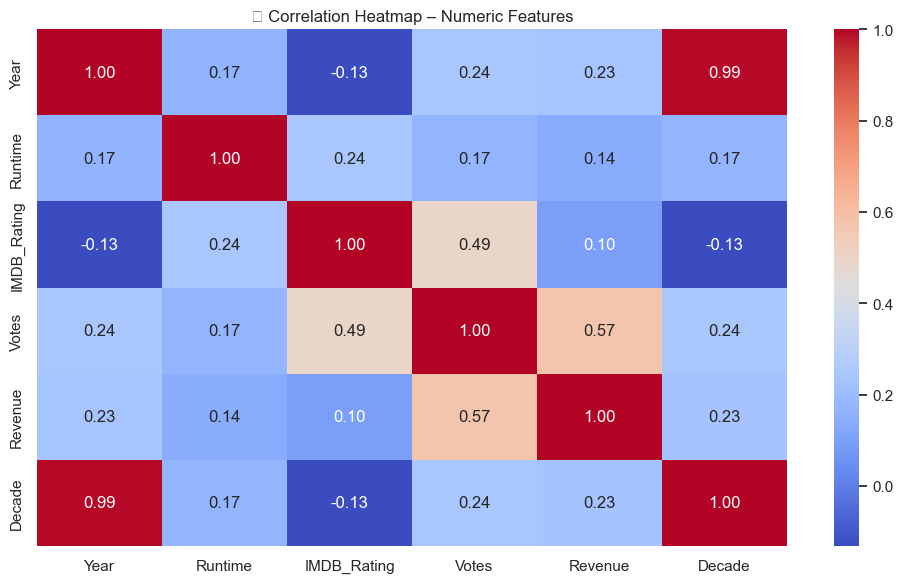

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Correlation Heatmap – Numeric Features")
plt.tight_layout()
plt.show()


In [60]:
import plotly.express as px

# Filter out rows with missing values in relevant columns
df_filtered = df[['Title', 'Year', 'Votes', 'IMDB_Rating', 'Revenue']].dropna()

# Plot interactive scatter
fig = px.scatter(
    df_filtered,
    x='Votes',
    y='IMDB_Rating',
    size='Revenue',
    hover_data=['Title', 'Year'],
    title='💡 Popularity (Votes) vs Rating',
    template='plotly_dark',
    size_max=40
)

fig.show()


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numeric features and drop rows with missing values
features = df[['IMDB_Rating', 'Votes', 'Revenue', 'Runtime']].dropna()

# Standardize features (very important before clustering!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Create a DataFrame for visualization
cluster_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
cluster_df['Cluster'] = clusters
cluster_df['Title'] = df.loc[features.index, 'Title'].values
cluster_df['Year'] = df.loc[features.index, 'Year'].values


c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



C:\Users\juanm\AppData\Local\Temp\ipykernel_34520\2312952008.py:15: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.

c:\Users\juanm\miniconda3\envs\eda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.



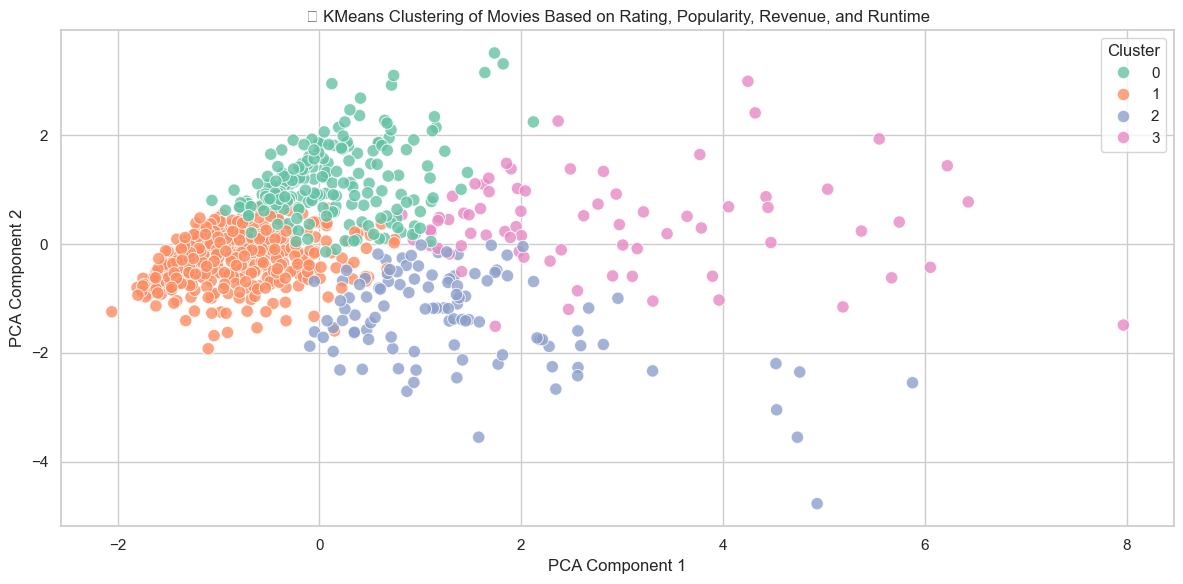

In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=cluster_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=80,
    alpha=0.8
)
plt.title("🎯 KMeans Clustering of Movies Based on Rating, Popularity, Revenue, and Runtime")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()


In [63]:
# Add cluster back to the original dataset
df_clustered = df.loc[features.index].copy()
df_clustered['Cluster'] = clusters

# Summary statistics per cluster
cluster_summary = df_clustered.groupby('Cluster').agg({
    'Title': 'count',
    'IMDB_Rating': 'mean',
    'Votes': 'mean',
    'Revenue': 'mean',
    'Runtime': 'mean'
}).rename(columns={'Title': 'Movie_Count'}).round(2)

cluster_summary


,Movie_Count,IMDB_Rating,Votes,Revenue,Runtime
Cluster,,,,,
0,203,8.04,191520.84,2.943504e+07,153.67
1,447,7.82,173092.41,2.782119e+07,108.64
2,108,7.90,612206.93,2.698272e+08,124.13
3,73,8.52,1090455.45,1.230706e+08,136.26


### Clustering Analysis – Key Insights

We applied KMeans clustering (k=4) to group movies based on four numerical features:
- `IMDB_Rating` (perceived quality)
- `Votes` (popularity)
- `Revenue` (commercial success)
- `Runtime` (length)

The data was standardized and reduced to two dimensions using PCA for visualization.

#### Cluster Interpretation

- **Cluster 0**: Movies with moderately high ratings and votes, average revenue and runtime. Likely includes many critically successful but not massively popular films.
- **Cluster 1**: Low-rating, low-revenue, short-length films with minimal audience engagement. Possibly represents indie or lesser-known productions.
- **Cluster 2**: Mid-tier performers in terms of all variables. These could be stable commercial releases with decent audience reception.
- **Cluster 3**: Top-performing blockbusters with very high revenue, votes, and longer runtimes. These are likely large franchises and highly popular titles.

#### Summary

Clustering helped us identify distinct groups of movies based on their numerical profiles. This segmentation could be valuable for:
- Targeted recommendation systems
- Distribution strategies
- Understanding market patterns by category

Further steps could include increasing the number of clusters or using alternative algorithms (e.g., DBSCAN, hierarchical clustering) to compare results.


## Final EDA Summary – Key Takeaways

After cleaning and exploring the dataset of over 1,000 movies, we can summarize the following insights:

### Genre Analysis
- **Drama** and **Comedy** are the most frequent genres.
- **Drama** and **Mystery** tend to receive higher average ratings.
- Some genres (e.g., **Crime**, **Adventure**) show strong commercial performance.

### Decade Trends
- The number of movies increased significantly in the 2000s and 2010s.
- Highest average revenues were observed in the 2010s.
- Ratings remained relatively stable across decades.

### Certificate Insights
- **R-rated** movies dominate in terms of votes and revenue.
- **PG-13** holds the highest average rating among popular classifications.
- **Unrated** films tend to have lower revenue and popularity.

### Director Productivity
- Directors like **Steven Spielberg** and **Alfred Hitchcock** have the most entries.
- Top-rated directors (with at least 3 movies) include names like **Christopher Nolan**, **David Fincher**, and **Quentin Tarantino**.

### Clustering Results
- We identified 4 clusters of movies based on rating, votes, revenue, and runtime:
  - Blockbusters with high votes and revenue
  - Low-rated, less popular movies
  - Critically strong but commercially average titles
  - Balanced performers in all dimensions

> These insights provide a solid base for storytelling, segmentation, recommendation systems, and business strategy.


In [65]:
# Top 10 movies by rating (break ties with number of votes)
top10_rating = df.sort_values(by=['IMDB_Rating', 'Votes'], ascending=[False, False]).head(10)
top10_rating.to_csv('Data/processed/top10_by_rating.csv', index=False)


In [67]:
# Top 10 movies by revenue
top10_revenue = df.sort_values(by=['Revenue', 'Votes'], ascending=[False, False]).head(10)
top10_revenue.to_csv('Data/processed/top10_by_revenue.csv', index=False)
